Importing the image dataset

In [ ]:
from google.colab import files
files.upload()

Saving Trial_F1.zip to Trial_F1.zip


**Importing CSV file**

In [ ]:
from google.colab import files
files.upload()

Saving Cpss_wayanad_data.csv to Cpss_wayanad_data.csv


{'Cpss_wayanad_data.csv': b'Farmer Name,Field type,Cultivation Nature,Rice,Pest/Disease,infection_type,latitude,longitude,stageOfCrop,waterLevel,weatherCondn,condnOfCrop,weedGrowthMain,weedGrowthBund,total_count,no_of_pests,no_of_defenders,no_of_neutrals,dpPlot1,dpPlot2,dpPlot3,dpPlot4,average,eggmass,moth,intensity,intensity_type,dtls_updatedOn\r\nBalakrishnan KC,Fixed,Organic,Rice,Rice Case Worm,Pest,11.79704,76.071435,Early tillering,5 cm,Cloudy,Satisfactory,Mild,Mild,28,32,12,6,30,30,30,30,30,1,3,1,Mild,10/3/2018\r\nBalakrishnan KC,Fixed,Organic,Rice,Rice Bug,Pest,11.79724833,76.07109,Flowering,5 cm,Sunny,Poor,Mild,Mild,7,4,2,3,6,9,0,8,5.75,0,5,1,Mild,12/1/2018\r\nBalakrishnan KC,Fixed,Organic,Rice,Rice stem borer,Pest,11.79722333,76.07114667,Seedling,>10 cm,Sunny,Poor,Moderate,Mild,15,12,7,6,20,25,35,30,27.5,8,5,1,Mild,11/15/2018\r\nCHANDRAGATHAN,Fixed,Non-organic,Rice,Rice Hispa,Pest,11.67857538,76.27488711,Seedling,Muddy,Cloudy,Good,Mild,Mild,3,15,18,5,40,20,20,35,28.75,0,0,1,Mi

In [ ]:
import pandas as pd 
  
df = pd.read_csv('Cpss_wayanad_data.csv')
print(df)

         Farmer Name Field type  ... intensity_type dtls_updatedOn
0    Balakrishnan KC      Fixed  ...           Mild      10/3/2018
1    Balakrishnan KC      Fixed  ...           Mild      12/1/2018
2    Balakrishnan KC      Fixed  ...           Mild     11/15/2018
3      CHANDRAGATHAN      Fixed  ...           Mild      7/30/2018
4         Damodharan      Fixed  ...       Moderate     11/12/2019
..               ...        ...  ...            ...            ...
397       Shaji jose      Fixed  ...           Mild      11/8/2019
398       Shaji jose      Fixed  ...       Moderate      11/8/2019
399       Shaji jose      Fixed  ...         Severe      10/3/2018
400       Shaji jose      Fixed  ...            NaN     10/24/2018
401       Shaji jose      Fixed  ...           Mild      11/8/2019

[402 rows x 28 columns]


**Dropping unwanted columns**

In [ ]:
df = df.drop(['Farmer Name','Rice','dtls_updatedOn','dpPlot1','dpPlot2','dpPlot3','dpPlot4','intensity_type'], axis=1)
df = df.dropna(how='any')
df.head()

,Field type,Cultivation Nature,Pest/Disease,infection_type,latitude,longitude,stageOfCrop,waterLevel,weatherCondn,condnOfCrop,weedGrowthMain,weedGrowthBund,total_count,no_of_pests,no_of_defenders,no_of_neutrals,average,eggmass,moth,intensity
0,Fixed,Organic,Rice Case Worm,Pest,11.797040,76.071435,Early tillering,5 cm,Cloudy,Satisfactory,Mild,Mild,28,32,12,6,30.00,1,3,1
1,Fixed,Organic,Rice Bug,Pest,11.797248,76.071090,Flowering,5 cm,Sunny,Poor,Mild,Mild,7,4,2,3,5.75,0,5,1
2,Fixed,Organic,Rice stem borer,Pest,11.797223,76.071147,Seedling,>10 cm,Sunny,Poor,Moderate,Mild,15,12,7,6,27.50,8,5,1
3,Fixed,Non-organic,Rice Hispa,Pest,11.678575,76.274887,Seedling,Muddy,Cloudy,Good,Mild,Mild,3,15,18,5,28.75,0,0,1
4,Fixed,Organic,Rice Blast,Disease,11.733276,76.002502,Mid tillering,Muddy,Sunny,Poor,Mild,Mild,35,8,3,3,2.00,0,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 401
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Field type          402 non-null    object 
 1   Cultivation Nature  402 non-null    object 
 2   Pest/Disease        402 non-null    object 
 3   infection_type      402 non-null    object 
 4   latitude            402 non-null    float64
 5   longitude           402 non-null    float64
 6   stageOfCrop         402 non-null    object 
 7   waterLevel          402 non-null    object 
 8   weatherCondn        402 non-null    object 
 9   condnOfCrop         402 non-null    object 
 10  weedGrowthMain      402 non-null    object 
 11  weedGrowthBund      402 non-null    object 
 12  total_count         402 non-null    int64  
 13  no_of_pests         402 non-null    int64  
 14  no_of_defenders     402 non-null    int64  
 15  no_of_neutrals      402 non-null    int64  
 16  average 

**Replacing 0 in the 'intensity' column**

In [ ]:
df['intensity'].replace(0,np.nan, inplace= True)
df = df.dropna(how='any')
df.head()

,Field type,Cultivation Nature,Pest/Disease,infection_type,latitude,longitude,stageOfCrop,waterLevel,weatherCondn,condnOfCrop,weedGrowthMain,weedGrowthBund,total_count,no_of_pests,no_of_defenders,no_of_neutrals,average,eggmass,moth,intensity
0,Fixed,Organic,Rice Case Worm,Pest,11.797040,76.071435,Early tillering,5 cm,Cloudy,Satisfactory,Mild,Mild,28,32,12,6,30.00,1,3,1.0
1,Fixed,Organic,Rice Bug,Pest,11.797248,76.071090,Flowering,5 cm,Sunny,Poor,Mild,Mild,7,4,2,3,5.75,0,5,1.0
2,Fixed,Organic,Rice stem borer,Pest,11.797223,76.071147,Seedling,>10 cm,Sunny,Poor,Moderate,Mild,15,12,7,6,27.50,8,5,1.0
3,Fixed,Non-organic,Rice Hispa,Pest,11.678575,76.274887,Seedling,Muddy,Cloudy,Good,Mild,Mild,3,15,18,5,28.75,0,0,1.0
4,Fixed,Organic,Rice Blast,Disease,11.733276,76.002502,Mid tillering,Muddy,Sunny,Poor,Mild,Mild,35,8,3,3,2.00,0,0,2.0


**Finding the unique names of diseases**

In [ ]:
df[df['infection_type']=='Disease']['Pest/Disease'].unique()

array(['Rice Blast', 'Brown Leaf Spot', 'Bacterial Leaf Blight',
       'Sheath Rot', 'Sheath Blight', 'Bacterial Leaf Streak', 'Tungro',
       'False Smut', 'Udbatta'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 401
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Field type          361 non-null    object 
 1   Cultivation Nature  361 non-null    object 
 2   Pest/Disease        361 non-null    object 
 3   infection_type      361 non-null    object 
 4   latitude            361 non-null    float64
 5   longitude           361 non-null    float64
 6   stageOfCrop         361 non-null    object 
 7   waterLevel          361 non-null    object 
 8   weatherCondn        361 non-null    object 
 9   condnOfCrop         361 non-null    object 
 10  weedGrowthMain      361 non-null    object 
 11  weedGrowthBund      361 non-null    object 
 12  total_count         361 non-null    int64  
 13  no_of_pests         361 non-null    int64  
 14  no_of_defenders     361 non-null    int64  
 15  no_of_neutrals      361 non-null    int64  
 16  average 

**Finding unique values in all the columns**

In [ ]:
print(df['Field type'].unique())
print(df['Cultivation Nature'].unique())
print(df['Pest/Disease'].unique())
print(df['stageOfCrop'].unique())
print(df['waterLevel'].unique())
print(df['weatherCondn'].unique())
print(df['condnOfCrop'].unique())
print(df['weedGrowthMain'].unique())
print(df['weedGrowthBund'].unique())

['Fixed' 'Roving']
['Organic' 'Non-organic']
['Rice Case Worm' 'Rice Bug' 'Rice stem borer' 'Rice Hispa' 'Rice Blast'
 'Brown Leaf Spot' 'Rice Blue Beetle' 'Bacterial Leaf Blight'
 'Paddy Leaf Roller' 'Rice Swarming Caterpillar' 'Sheath Rot'
 'Whorl Maggot' 'Sheath Blight' 'Rice Gall Midge' 'Bacterial Leaf Streak'
 'Rice Thrips' 'Brown Plant Hopper' 'Tungro' 'False Smut' 'Udbatta'
 'Green Leaf Hopper']
['Early tillering' 'Flowering' 'Seedling' 'Mid tillering'
 'Panicle initiation' 'Dough stage' 'Ripening' 'Boot'
 'Germination and emergence' 'Mature' 'Milky stage']
['5 cm' '>10 cm' 'Muddy' 'Dry' '10 cm']
['Cloudy' 'Sunny' 'Rain-Mild-Moderate-Severe' 'Drizzle']
['Satisfactory' 'Poor' 'Good' 'Fair' 'Excellent']
['Mild' 'Moderate' 'Severe']
['Mild' 'Moderate' 'Severe']


**Creating the feature and label sets**

In [ ]:
X = df.drop('infection_type',axis = 1)
X.head()

,Field type,Cultivation Nature,Pest/Disease,latitude,longitude,stageOfCrop,waterLevel,weatherCondn,condnOfCrop,weedGrowthMain,weedGrowthBund,total_count,no_of_pests,no_of_defenders,no_of_neutrals,average,eggmass,moth,intensity
0,Fixed,Organic,Rice Case Worm,11.797040,76.071435,Early tillering,5 cm,Cloudy,Satisfactory,Mild,Mild,28,32,12,6,30.00,1,3,1.0
1,Fixed,Organic,Rice Bug,11.797248,76.071090,Flowering,5 cm,Sunny,Poor,Mild,Mild,7,4,2,3,5.75,0,5,1.0
2,Fixed,Organic,Rice stem borer,11.797223,76.071147,Seedling,>10 cm,Sunny,Poor,Moderate,Mild,15,12,7,6,27.50,8,5,1.0
3,Fixed,Non-organic,Rice Hispa,11.678575,76.274887,Seedling,Muddy,Cloudy,Good,Mild,Mild,3,15,18,5,28.75,0,0,1.0
4,Fixed,Organic,Rice Blast,11.733276,76.002502,Mid tillering,Muddy,Sunny,Poor,Mild,Mild,35,8,3,3,2.00,0,0,2.0


In [ ]:
y = df['infection_type']
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(361, 19)
<class 'pandas.core.frame.DataFrame'>
(361,)
<class 'pandas.core.series.Series'>


**One-hot encoding**

In [ ]:
X = pd.get_dummies(X,columns=['Field type','Cultivation Nature','Pest/Disease','stageOfCrop','waterLevel','weatherCondn','condnOfCrop','weedGrowthMain','weedGrowthBund'])
X.head()

,latitude,longitude,total_count,no_of_pests,no_of_defenders,no_of_neutrals,average,eggmass,moth,intensity,Field type_Fixed,Field type_Roving,Cultivation Nature_Non-organic,Cultivation Nature_Organic,Pest/Disease_Bacterial Leaf Blight,Pest/Disease_Bacterial Leaf Streak,Pest/Disease_Brown Leaf Spot,Pest/Disease_Brown Plant Hopper,Pest/Disease_False Smut,Pest/Disease_Green Leaf Hopper,Pest/Disease_Paddy Leaf Roller,Pest/Disease_Rice Blast,Pest/Disease_Rice Blue Beetle,Pest/Disease_Rice Bug,Pest/Disease_Rice Case Worm,Pest/Disease_Rice Gall Midge,Pest/Disease_Rice Hispa,Pest/Disease_Rice Swarming Caterpillar,Pest/Disease_Rice Thrips,Pest/Disease_Rice stem borer,Pest/Disease_Sheath Blight,Pest/Disease_Sheath Rot,Pest/Disease_Tungro,Pest/Disease_Udbatta,Pest/Disease_Whorl Maggot,stageOfCrop_Boot,stageOfCrop_Dough stage,stageOfCrop_Early tillering,stageOfCrop_Flowering,stageOfCrop_Germination and emergence,stageOfCrop_Mature,stageOfCrop_Mid tillering,stageOfCrop_Milky stage,stageOfCrop_Panicle initiation,stageOfCrop_Ripening,stageOfCrop_Seedling,waterLevel_10 cm,waterLevel_5 cm,waterLevel_>10 cm,waterLevel_Dry,waterLevel_Muddy,weatherCondn_Cloudy,weatherCondn_Drizzle,weatherCondn_Rain-Mild-Moderate-Severe,weatherCondn_Sunny,condnOfCrop_Excellent,condnOfCrop_Fair,condnOfCrop_Good,condnOfCrop_Poor,condnOfCrop_Satisfactory,weedGrowthMain_Mild,weedGrowthMain_Moderate,weedGrowthMain_Severe,weedGrowthBund_Mild,weedGrowthBund_Moderate,weedGrowthBund_Severe
0,11.797040,76.071435,28,32,12,6,30.00,1,3,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0
1,11.797248,76.071090,7,4,2,3,5.75,0,5,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
2,11.797223,76.071147,15,12,7,6,27.50,8,5,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
3,11.678575,76.274887,3,15,18,5,28.75,0,0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,11.733276,76.002502,35,8,3,3,2.00,0,0,2.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0


**Splitting into training and testing datasets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=42)

**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Random Forest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200,min_samples_leaf=2,max_depth=10)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Finding accuracy of training and testing data**

In [ ]:
model.score(X_test,y_test)

0.9726027397260274

In [ ]:
model.score(X_train,y_train)

1.0

**Predicting on test data**

In [ ]:
y_pred = model.predict(X_test[0:20])
y_pred

array(['Pest', 'Disease', 'Pest', 'Pest', 'Pest', 'Disease', 'Disease',
       'Pest', 'Pest', 'Disease', 'Disease', 'Disease', 'Disease', 'Pest',
       'Disease', 'Disease', 'Disease', 'Disease', 'Pest', 'Disease'],
      dtype=object)

In [ ]:
y_test.head(20)

179       Pest
35     Disease
15        Pest
359       Pest
60        Pest
200    Disease
81     Disease
130       Pest
297       Pest
137    Disease
286    Disease
41     Disease
255    Disease
58        Pest
150    Disease
219    Disease
282    Disease
246    Disease
363       Pest
111    Disease
Name: infection_type, dtype: object

**If classified as disease, unzip the image dataset**

In [ ]:
!unzip Trial_F1.zip

Archive:  Trial_F1.zip
   creating: Trial_F1/Images/
   creating: Trial_F1/Images/Bacterial Leaf Blight/
  inflating: Trial_F1/Images/Bacterial Leaf Blight/blight__0_1021.jpg  
  inflating: Trial_F1/Images/Bacterial Leaf Blight/blight__0_1024.jpg  
  inflating: Trial_F1/Images/Bacterial Leaf Blight/blight__0_1040.jpg  
  inflating: Trial_F1/Images/Bacterial Leaf Blight/blight__0_1055.jpg  
  inflating: Trial_F1/Images/Bacterial Leaf Blight/blight__0_1057.jpg  
  inflating: Trial_F1/Images/Bacterial Leaf Blight/blight__0_1059.jpg  
  inflating: Trial_F1/Images/Bacterial Leaf Blight/blight__0_1071.jpg  
  inflating: Trial_F1/Images/Bacterial Leaf Blight/blight__0_1072.jpg  
  inflating: Trial_F1/Images/Bacterial Leaf Blight/blight__0_1083.jpg  
  inflating: Trial_F1/Images/Bacterial Leaf Blight/blight__0_1090.jpg  
  inflating: Trial_F1/Images/Bacterial Leaf Blight/blight__0_1098.jpg  
  inflating: Trial_F1/Images/Bacterial Leaf Blight/blight__0_11.jpg  
  inflating: Trial_F1/Images/Bact

**Importing the necessary packages**

In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
EPOCHS = 10
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/Trial_F1'
width=256
height=256
depth=3

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Tungro ...
[INFO] Processing Brown Leaf Spot ...
[INFO] Processing Rice Blast ...
[INFO] Processing Bacterial Leaf Blight ...
[INFO] Processing Sheath Blight ...
[INFO] Image loading completed


In [ ]:
image_size = len(image_list)

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

**Names of 5 classes of diseases**

In [ ]:
print(label_binarizer.classes_)

['Bacterial Leaf Blight' 'Brown Leaf Spot' 'Rice Blast' 'Sheath Blight'
 'Tungro']


In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

**Splitting into training and testing data**

In [ ]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)

[INFO] Spliting data to train, test


In [ ]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

**Creating the model**

In [ ]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
activation_35 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_36 (Activation)   (None, 85, 85, 64)       

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [ ]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=25, verbose=1
    )

Epoch 1/25
25/25 [==============================] - 11s 451ms/step - loss: 0.0553 - accuracy: 0.9500 - val_loss: 1.8506 - val_accuracy: 0.2950
Epoch 2/25
25/25 [==============================] - 11s 443ms/step - loss: 0.0723 - accuracy: 0.9312 - val_loss: 1.6086 - val_accuracy: 0.2950
Epoch 3/25
25/25 [==============================] - 11s 441ms/step - loss: 0.0664 - accuracy: 0.9375 - val_loss: 1.6867 - val_accuracy: 0.2400
Epoch 4/25
25/25 [==============================] - 11s 442ms/step - loss: 0.0449 - accuracy: 0.9550 - val_loss: 1.7947 - val_accuracy: 0.3150
Epoch 5/25
25/25 [==============================] - 11s 443ms/step - loss: 0.0526 - accuracy: 0.9463 - val_loss: 1.5884 - val_accuracy: 0.3500
Epoch 6/25
25/25 [==============================] - 11s 441ms/step - loss: 0.0547 - accuracy: 0.9550 - val_loss: 1.6837 - val_accuracy: 0.4800
Epoch 7/25
25/25 [==============================] - 11s 436ms/step - loss: 0.0526 - accuracy: 0.9650 - val_loss: 0.7944 - val_accuracy: 0.6900

**Plotting the accuracy**

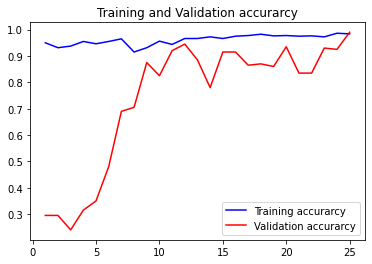

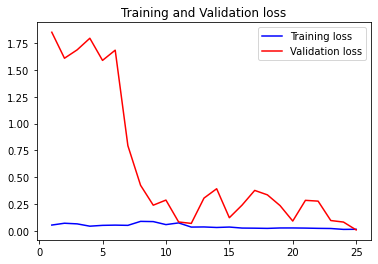

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


**Finding the accuracy of the model**

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
7/7 [==============================] - 0s 26ms/step - loss: 0.0101 - accuracy: 0.9900
Test Accuracy: 99.00000095367432
